In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%run ./main.py

# Started at Mon, 13 Jul 2020 15:52:21 +0900 JST
# ===========================
# Python version:  3.7.0 (default, Jun 28 2018, 13:15:42)  [GCC 7.2.0]
# API version:  1013
# Platform:  linux
# ===========================
# Elapse time for preparation:  0.0008726119995117188  [sec]
# Preparaiton is done
# ===========================
# Ended at Mon, 13 Jul 2020 15:52:21 +0900 JST


In [3]:
who

Atomfield	 Atomfluence	 Atomtime	 Atomvolume	 Hartree	 aB	 ch	 chbar	 ct	 
fpi	 halfepsc	 math	 np	 pi	 print_endtime	 print_footer	 print_header	 print_midtime	 
sol	 sys	 te	 time	 tpi	 ts	 tt	 zI	 


In [4]:
def f2F(t,f):
    F = 0.0*f
    dt = t[1] - t[0]
    Nt = len(t)
    for it in range(Nt-1):
        F[it + 1] = F[it] + (f[it] + f[it + 1])*dt/2.0
    F[Nt - 1] = 2.0*F[Nt - 2] - F[Nt - 3]
    return F
def F2f(t,F):
    f = 0.0*F
    dt = t[1] - t[0]
    Nt = len(t)
    for it in range(1,Nt-1):
        f[it] = (F[it + 1] - F[it - 1])/(2.0*dt)
    f[0] = 2.0*f[1] - f[2]
    f[Nt - 1] = 2.0*f[Nt - 2] - f[Nt - 3]
    return f

In [5]:
class parameter_class:
    def __init__(self):
        self.Nk = 20
        self.a = 10.0
        self.b = None
        self.k = None
        self.mv = -0.5
        self.mc = 0.1
        self.Eg = 0.2
        self.Nt = 1000
        self.Ncycle = 4
        self.E0 = 0.01
        self.omegac = 1.55/Hartree

    def Make_kspace(self):
        self.b = tpi/self.a
        self.k = np.linspace(-0.5*self.b, 0.5*self.b, self.Nk)


In [6]:
def Make_fields(PC):
    T = PC.Ncycle*(tpi/PC.omegac)
    t = np.linspace(0.0, T, PC.Nt)
    A = (PC.E0/PC.omegac)*np.sin(PC.omegac*t)
    E = -PC.E0*np.cos(PC.omegac*t)
    return t, A, E
def k2ec(PC,k):
    ec = 0.5*k**2/PC.mc + PC.Eg
    return ec
def k2ev(PC,k):
    ev = 0.5*k**2/PC.mv
    return ev
def k2vc(PC,k):
    vc = k/PC.mc
    return vc
def k2vv(PC,k):
    vv = k/PC.mv
    return vv


In [7]:
import matplotlib.pyplot as plt

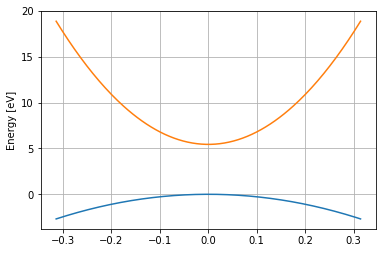

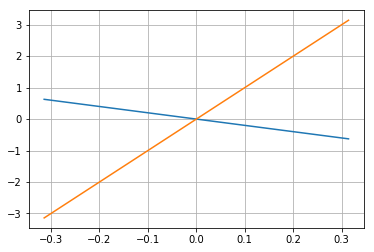

In [8]:
PC = parameter_class()
PC.Nt = 10000
PC.Nk = 200
PC.Ncycle = 100
PC.Make_kspace()
ev = k2ev(PC,PC.k)
ec = k2ec(PC,PC.k)
plt.figure()
plt.ylabel('Energy [eV]')
plt.plot(PC.k,ev*Hartree)
plt.plot(PC.k,ec*Hartree)
plt.grid()
plt.show()
#
vv = k2vv(PC,PC.k)
vc = k2vc(PC,PC.k)
plt.figure()
plt.plot(PC.k,vv)
plt.plot(PC.k,vc)
plt.grid()
plt.show()


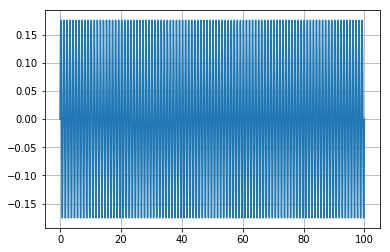

In [9]:
t, A, E= Make_fields(PC)
plt.figure()
plt.plot(t*PC.omegac/tpi,A)
plt.grid()
plt.show()

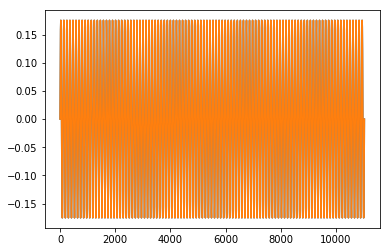

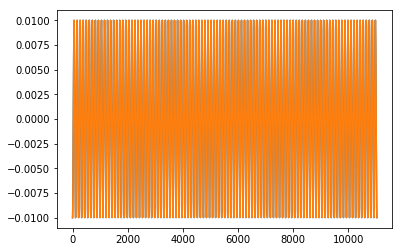

In [10]:
F = f2F(t,E.reshape([len(E),-1]))
plt.plot(t,A)
plt.plot(t,-F)
plt.show()
f = F2f(t,F)
plt.plot(t,E)
plt.plot(t,f)
plt.show()

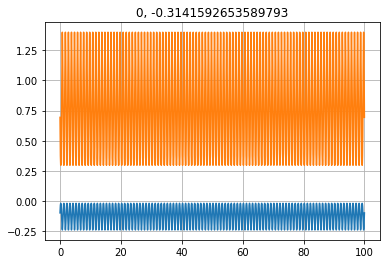

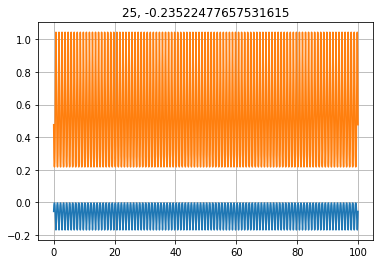

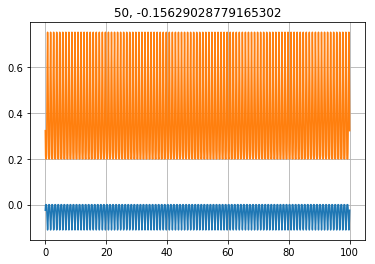

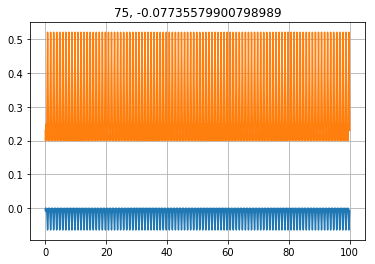

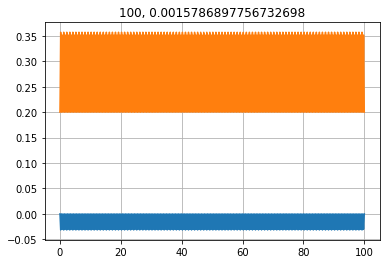

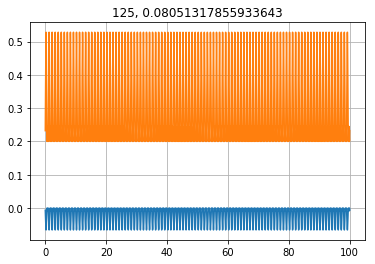

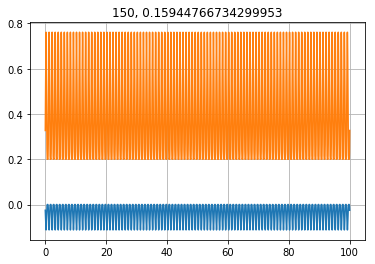

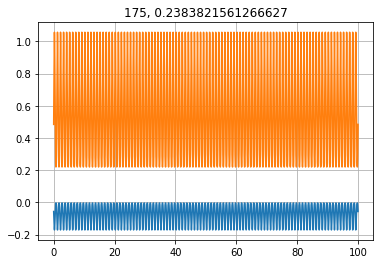

In [11]:
for nk in range(0,PC.Nk,PC.Nk//8):
    plt.figure()
    plt.title(str(nk)+', '+str(PC.k[nk]))
    plt.plot(t*PC.omegac/tpi,k2ev(PC,PC.k[nk] + A))
    plt.plot(t*PC.omegac/tpi,k2ec(PC,PC.k[nk] + A))
    plt.grid()
    plt.show()

0 200


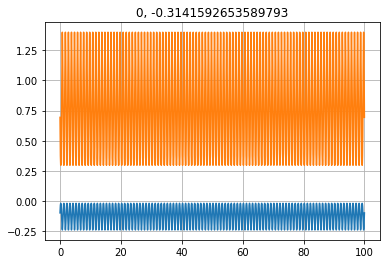

10 200


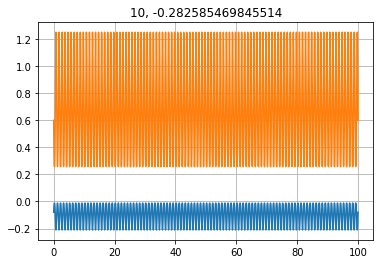

20 200


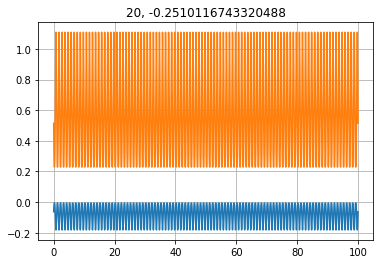

30 200


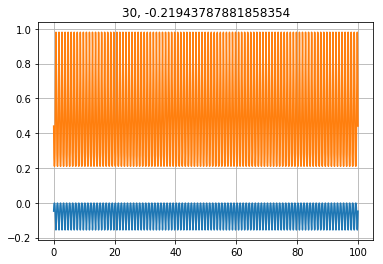

40 200


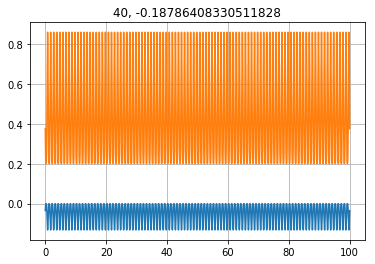

50 200


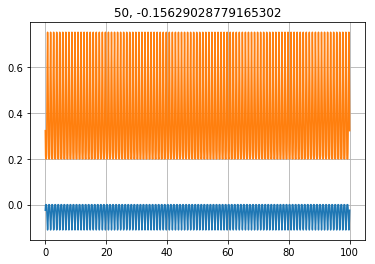

60 200


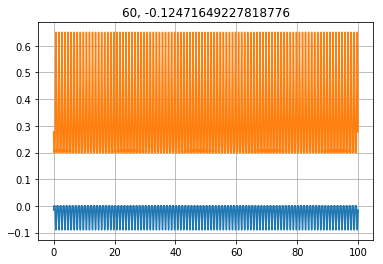

70 200


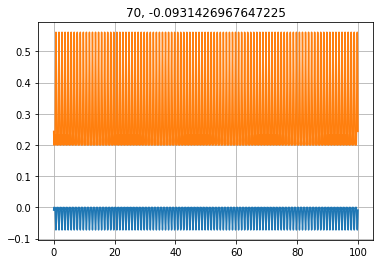

80 200


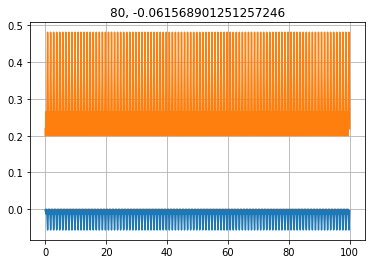

90 200


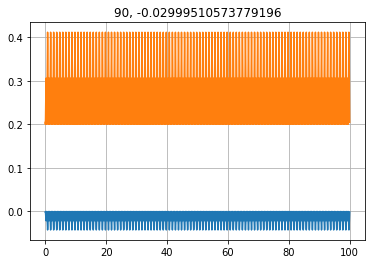

100 200


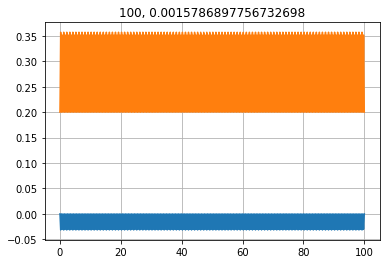

110 200


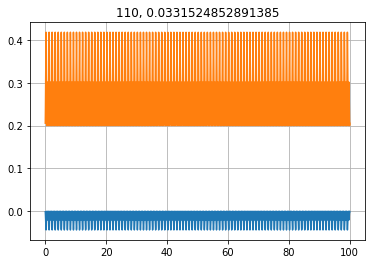

120 200


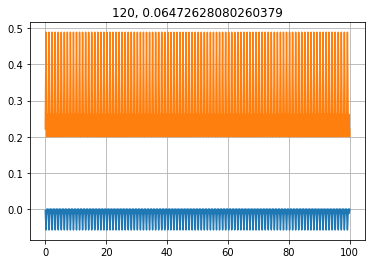

130 200


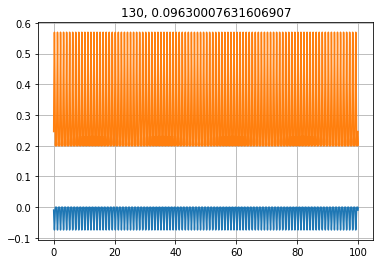

140 200


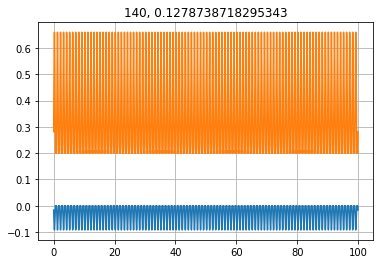

150 200


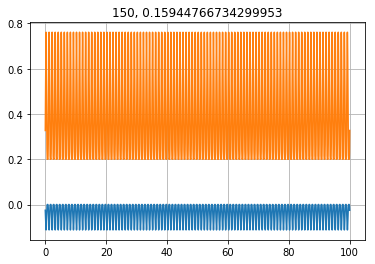

160 200


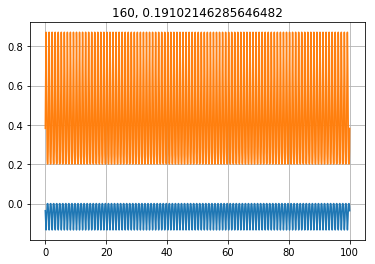

170 200


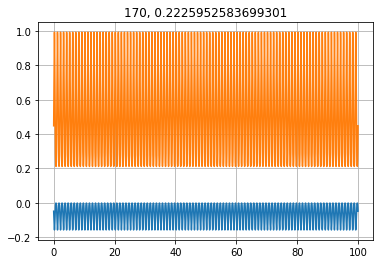

180 200


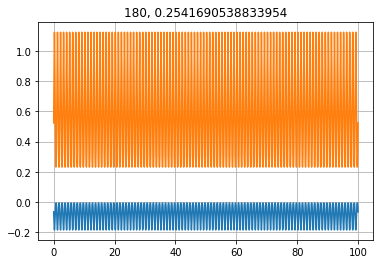

190 200


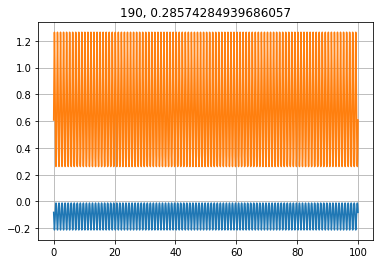

In [12]:
kpAt = np.zeros([PC.Nk,PC.Nt], dtype='float64')
for ik in range(PC.Nk):
    kpAt[ik, :] = PC.k[ik] + A[:]
#
for nk in range(0,PC.Nk,PC.Nk//20):
    print(str(nk), str(PC.Nk))
    plt.figure()
    plt.title(str(nk)+', '+str(kpAt[nk, 0]))
    plt.plot(t*PC.omegac/tpi,k2ev(PC, kpAt[nk, :]))
    plt.plot(t*PC.omegac/tpi,k2ec(PC, kpAt[nk, :]))
    plt.grid()
    plt.show()

(200, 10000)


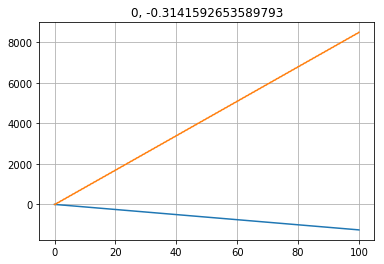

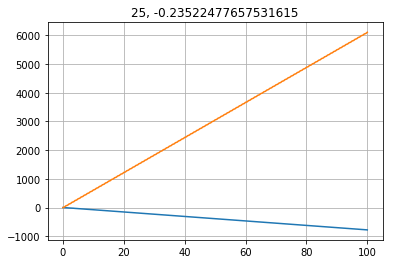

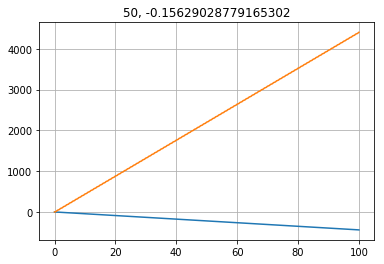

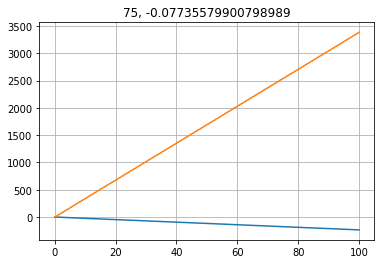

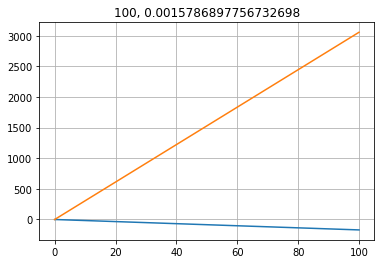

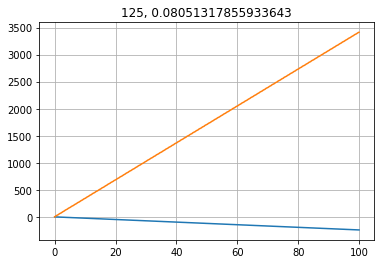

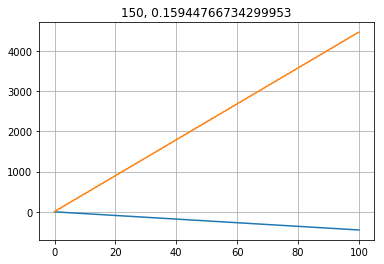

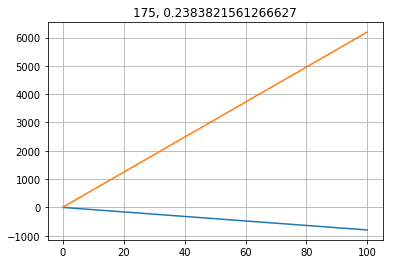

In [13]:
evkt = k2ev(PC,kpAt)
eckt = k2ec(PC,kpAt)
print(evkt.shape)
#
def ekt2thetakt(PC,ekt):
    thetakt = 0.0*ekt
    for ik in range(PC.Nk):
        thetakt[ik, :] = f2F(t,ekt[ik, :])
    return thetakt
thetavkt = ekt2thetakt(PC,evkt)
thetackt = ekt2thetakt(PC,eckt)
#thetavkt = 0.0*evkt
#thetackt = 0.0*eckt
#for ik in range(PC.Nk):
#    thetavkt[ik, :] = f2F(t,evkt[ik, :])
#    thetackt[ik, :] = f2F(t,eckt[ik, :])
for nk in range(0,PC.Nk,PC.Nk//8):
    plt.figure()
    plt.title(str(nk)+', '+str(kpAt[nk, 0]))
    plt.plot(t*PC.omegac/tpi,thetavkt[nk, :])
    plt.plot(t*PC.omegac/tpi,thetackt[nk, :])
    plt.grid()
    plt.show()

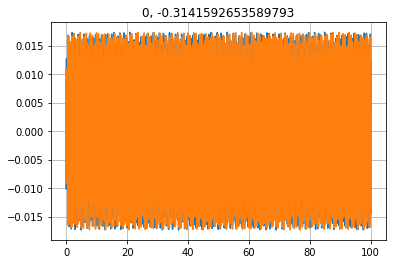

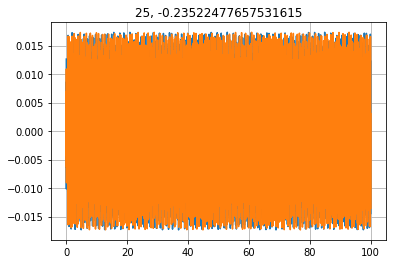

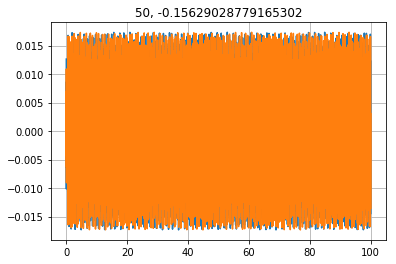

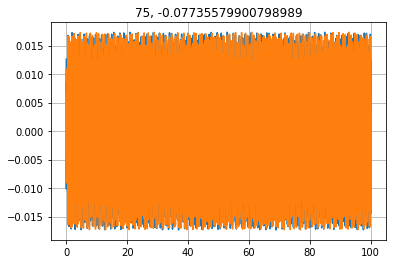

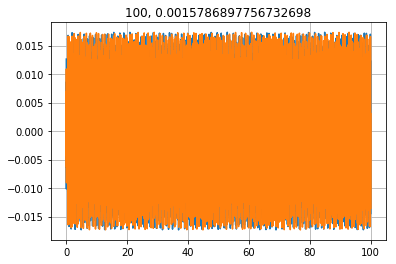

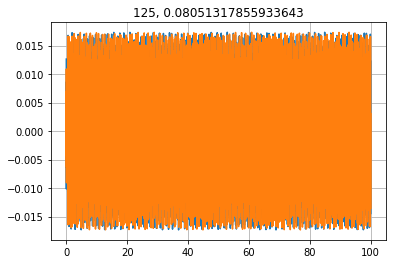

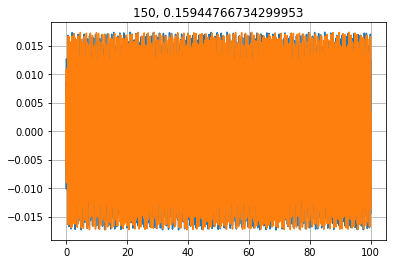

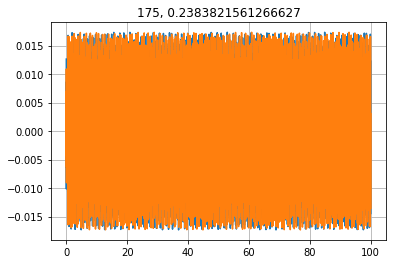

In [14]:
dcckt = (0.0 + 0.0*zI)*thetackt
for ik in range(PC.Nk):
    dcckt[ik, :] = np.exp(zI*(thetackt[ik, :] - thetavkt[ik, :]))*(-E[:])/(eckt[ik, :] - evkt[ik, :])
for nk in range(0,PC.Nk,PC.Nk//8):
    plt.figure()
    plt.title(str(nk)+', '+str(kpAt[nk, 0]))
    plt.plot(t*PC.omegac/tpi,np.real(dcckt[ik, :]), label='real')
    plt.plot(t*PC.omegac/tpi,np.imag(dcckt[ik, :]), label='imag')
    plt.grid()
    plt.show()

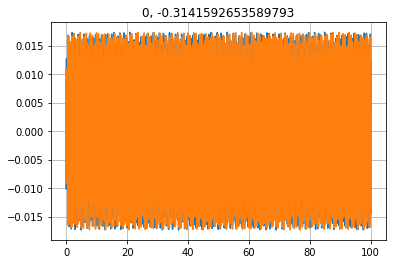

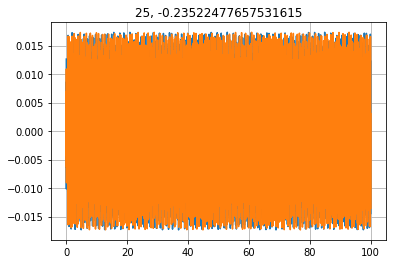

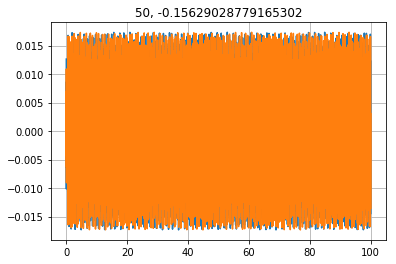

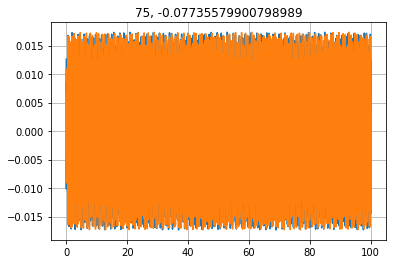

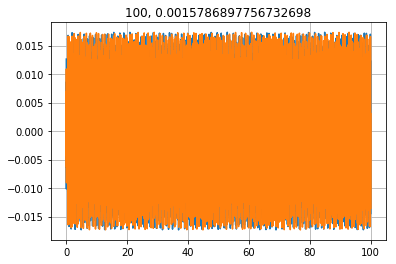

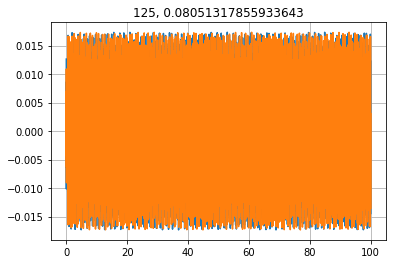

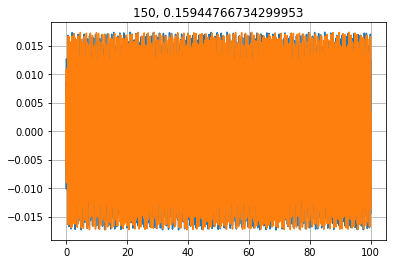

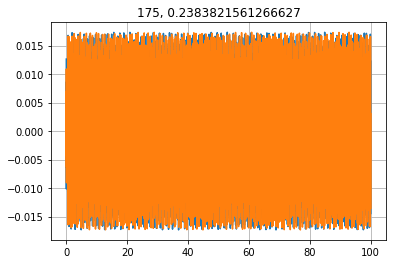

In [15]:
for ik in range(PC.Nk):
    dcckt[ik, :] = np.exp(zI*(thetackt[ik, :] - thetavkt[ik, :]))*(-E[:])/(eckt[ik, :] - evkt[ik, :])
for nk in range(0,PC.Nk,PC.Nk//8):
    plt.figure()
    plt.title(str(nk)+', '+str(kpAt[nk, 0]))
    plt.plot(t*PC.omegac/tpi,np.real(dcckt[ik, :]), label='real')
    plt.plot(t*PC.omegac/tpi,np.imag(dcckt[ik, :]), label='imag')
    plt.grid()
    plt.show()

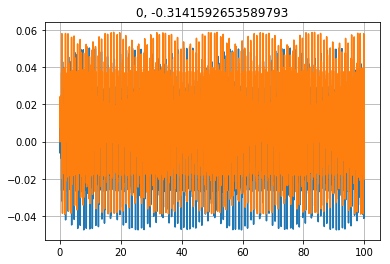

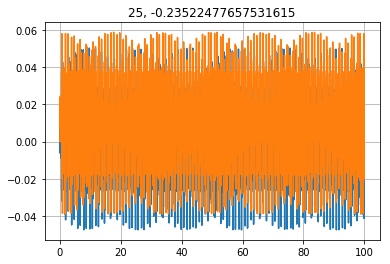

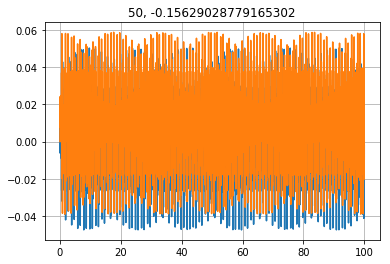

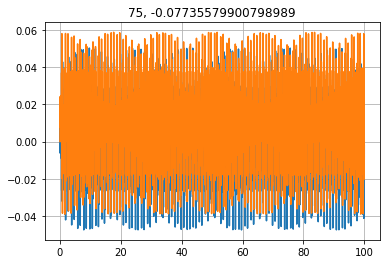

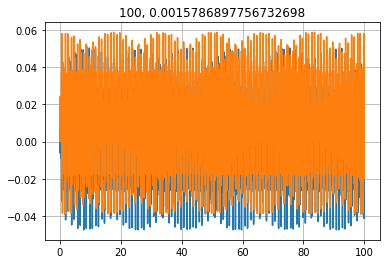

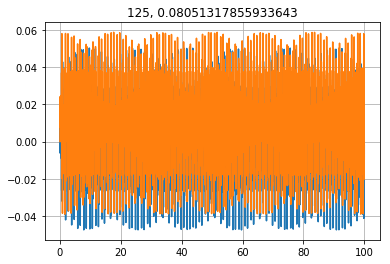

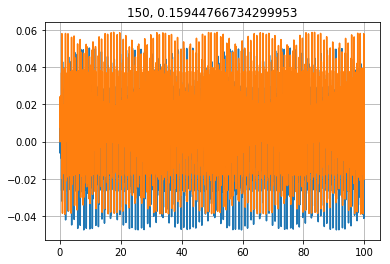

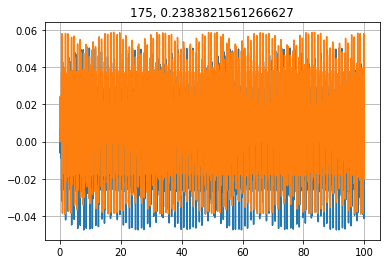

In [16]:
cckt = 0.0*dcckt
for  ik in range(PC.Nk):
    cckt[ik, :] = f2F(t,dcckt[ik, :])
for nk in range(0,PC.Nk,PC.Nk//8):
    plt.figure()
    plt.title(str(nk)+', '+str(kpAt[nk, 0]))
    plt.plot(t*PC.omegac/tpi,np.real(cckt[ik, :]), label='real')
    plt.plot(t*PC.omegac/tpi,np.imag(cckt[ik, :]), label='imag')
    plt.grid()
    plt.show()

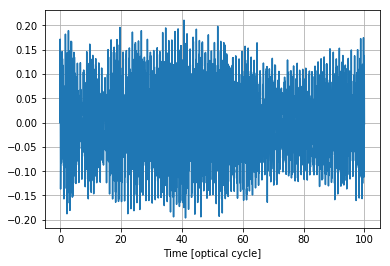

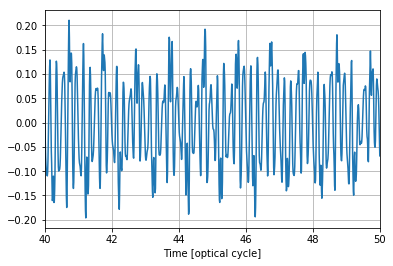

In [17]:
jk = 0.0*cckt
for ik in range(PC.Nk):
    jk[ik, :] = cckt[ik, :]* np.exp(zI*(thetavkt[ik, :] - thetackt[ik, :]))
J = np.sum(jk, axis=0)/PC.Nk
J = 2.0*np.real(J)
plt.figure()
plt.xlabel('Time [optical cycle]')
plt.plot(t*PC.omegac/tpi,J)
plt.grid()
plt.show()
plt.figure()
plt.xlim(40.0,50.0)
plt.xlabel('Time [optical cycle]')
plt.plot(t*PC.omegac/tpi,J)
plt.grid()
plt.show()

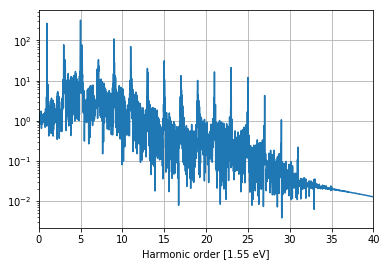

In [18]:
dt = t[1] - t[0]
omega = np.fft.fftfreq(PC.Nt)*(tpi/dt)
JF = np.fft.fft(J)
plt.figure()
plt.xlim(0.0,40.0)
plt.xlabel('Harmonic order [1.55 eV]')
plt.yscale('log')
plt.plot(omega[:PC.Nt//2]/PC.omegac,np.abs(JF[:PC.Nt//2]))
plt.grid()
plt.show()